In [1]:
import torch
import torch.nn.functional as F
import utils
from importlib import reload
reload(utils)

<module 'utils' from '/home/amitaharoni/workspace/cv-sprint/models/utils.py'>

In [2]:
train_dl, valid_dl, test_dl = utils.make_tiny_imagenet_dataloaders()

In [3]:
class AlexNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = torch.nn.Sequential(
            # 64x64 => 30x30
            torch.nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=2),
            torch.nn.BatchNorm2d(num_features=10),
            torch.nn.ReLU(),
            # 30x30 => 15x15
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # 15x15 => 13x13
            torch.nn.Conv2d(in_channels=10, out_channels=32, kernel_size=3),
            torch.nn.BatchNorm2d(num_features=32),
            torch.nn.ReLU(),
            # 13x13 => 6x6
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding='same'),
            torch.nn.BatchNorm2d(num_features=64),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3, padding='same'),
            torch.nn.BatchNorm2d(num_features=96),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=96, out_channels=128, kernel_size=3, padding='same'),
            torch.nn.BatchNorm2d(num_features=128),
            torch.nn.ReLU(),
            # 6x6 => 3x3
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # 3x3x128 => 1152
            torch.nn.Flatten(),
            torch.nn.Linear(in_features=1152, out_features=512),
            torch.nn.BatchNorm1d(num_features=512),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(in_features=512, out_features=256),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(in_features=256, out_features=200),
        )

    def forward(self, x):
        return self.layers(x)

model = AlexNet()
model = model.to(utils.device)
model

AlexNet(
  (layers): Sequential(
    (0): Conv2d(3, 10, kernel_size=(5, 5), stride=(2, 2))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(10, 32, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (12): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (15): BatchNorm2d(128, eps=1e-05,

In [4]:
loss_fn = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())

In [5]:
hist = utils.train_model(model, train_dl, valid_dl, loss_fn, optim, 
                         tensorboard_dir='../runs/01-alexnet', metrics=[utils.metric_accuracy],
                         epochs=1000,
                         patience=4)

100%|██████████| 157/157 [00:01<00:00, 147.86it/s]


Epoch 1/1000: train_loss=4.8349, train_accuracy=0.0381, val_loss=4.5814, val_accuracy=0.0636
Saving params from epoch 1. Best loss: 4.5814


100%|██████████| 157/157 [00:01<00:00, 150.78it/s]


Epoch 2/1000: train_loss=4.3548, train_accuracy=0.0840, val_loss=4.1244, val_accuracy=0.1108
Saving params from epoch 2. Best loss: 4.1244


100%|██████████| 157/157 [00:01<00:00, 143.79it/s]


Epoch 3/1000: train_loss=4.1358, train_accuracy=0.1103, val_loss=4.1522, val_accuracy=0.1213


100%|██████████| 157/157 [00:01<00:00, 146.41it/s]


Epoch 4/1000: train_loss=3.9992, train_accuracy=0.1296, val_loss=3.8727, val_accuracy=0.1548
Saving params from epoch 4. Best loss: 3.8727


100%|██████████| 157/157 [00:01<00:00, 142.54it/s]


Epoch 5/1000: train_loss=3.8968, train_accuracy=0.1444, val_loss=3.7767, val_accuracy=0.1656
Saving params from epoch 5. Best loss: 3.7767


100%|██████████| 157/157 [00:01<00:00, 122.70it/s]


Epoch 6/1000: train_loss=3.8101, train_accuracy=0.1586, val_loss=3.5883, val_accuracy=0.1968
Saving params from epoch 6. Best loss: 3.5883


100%|██████████| 157/157 [00:02<00:00, 74.21it/s] 


Epoch 7/1000: train_loss=3.7344, train_accuracy=0.1710, val_loss=3.6600, val_accuracy=0.1893


100%|██████████| 157/157 [00:01<00:00, 147.01it/s]


Epoch 8/1000: train_loss=3.6682, train_accuracy=0.1798, val_loss=3.7133, val_accuracy=0.1835


100%|██████████| 157/157 [00:01<00:00, 143.88it/s]


Epoch 9/1000: train_loss=3.5976, train_accuracy=0.1919, val_loss=3.5438, val_accuracy=0.2117
Saving params from epoch 9. Best loss: 3.5438


100%|██████████| 157/157 [00:01<00:00, 142.83it/s]


Epoch 10/1000: train_loss=3.5406, train_accuracy=0.2023, val_loss=3.4995, val_accuracy=0.2170
Saving params from epoch 10. Best loss: 3.4995


100%|██████████| 157/157 [00:01<00:00, 145.39it/s]


Epoch 11/1000: train_loss=3.4856, train_accuracy=0.2101, val_loss=3.4766, val_accuracy=0.2264
Saving params from epoch 11. Best loss: 3.4766


100%|██████████| 157/157 [00:01<00:00, 142.59it/s]


Epoch 12/1000: train_loss=3.4225, train_accuracy=0.2217, val_loss=3.4578, val_accuracy=0.2277
Saving params from epoch 12. Best loss: 3.4578


100%|██████████| 157/157 [00:01<00:00, 148.33it/s]


Epoch 13/1000: train_loss=3.3844, train_accuracy=0.2268, val_loss=3.4157, val_accuracy=0.2352
Saving params from epoch 13. Best loss: 3.4157


100%|██████████| 157/157 [00:01<00:00, 147.11it/s]


Epoch 14/1000: train_loss=3.3285, train_accuracy=0.2374, val_loss=3.3920, val_accuracy=0.2421
Saving params from epoch 14. Best loss: 3.3920


100%|██████████| 157/157 [00:01<00:00, 147.16it/s]


Epoch 15/1000: train_loss=3.2764, train_accuracy=0.2454, val_loss=3.4895, val_accuracy=0.2278


100%|██████████| 157/157 [00:01<00:00, 142.16it/s]


Epoch 16/1000: train_loss=3.2319, train_accuracy=0.2534, val_loss=3.4722, val_accuracy=0.2326


100%|██████████| 157/157 [00:01<00:00, 131.44it/s]


Epoch 17/1000: train_loss=3.1750, train_accuracy=0.2592, val_loss=3.3819, val_accuracy=0.2471
Saving params from epoch 17. Best loss: 3.3819


100%|██████████| 157/157 [00:01<00:00, 135.93it/s]


Epoch 18/1000: train_loss=3.1384, train_accuracy=0.2651, val_loss=3.3418, val_accuracy=0.2507
Saving params from epoch 18. Best loss: 3.3418


100%|██████████| 157/157 [00:01<00:00, 134.13it/s]


Epoch 19/1000: train_loss=3.0964, train_accuracy=0.2743, val_loss=3.3914, val_accuracy=0.2518


100%|██████████| 157/157 [00:01<00:00, 134.47it/s]


Epoch 20/1000: train_loss=3.0488, train_accuracy=0.2802, val_loss=3.4478, val_accuracy=0.2373


100%|██████████| 157/157 [00:01<00:00, 123.51it/s]


Epoch 21/1000: train_loss=3.0146, train_accuracy=0.2856, val_loss=3.4235, val_accuracy=0.2431


100%|██████████| 157/157 [00:01<00:00, 146.70it/s]


Epoch 22/1000: train_loss=2.9711, train_accuracy=0.2927, val_loss=3.4173, val_accuracy=0.2465
Loading model params from epoch 18


In [8]:
utils.evaluate_model(model, test_dl, loss_fn, metrics=[utils.metric_accuracy])

{'loss': 3.291606974029541, 'accuracy': 0.2564}

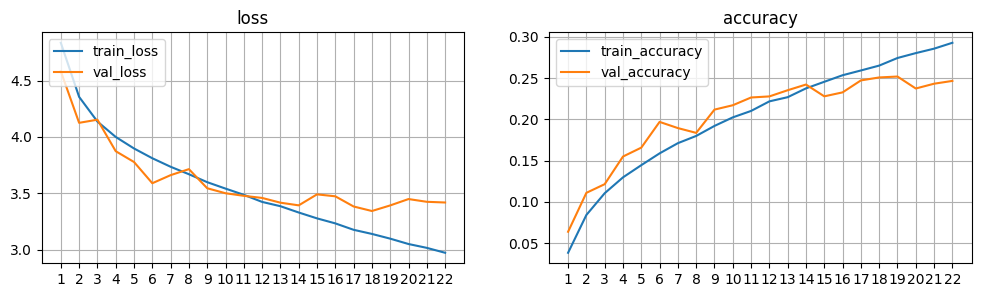

In [9]:
utils.plot_metrics(hist)